# Introduction to Spacy with NLP

## Basics of Spacy

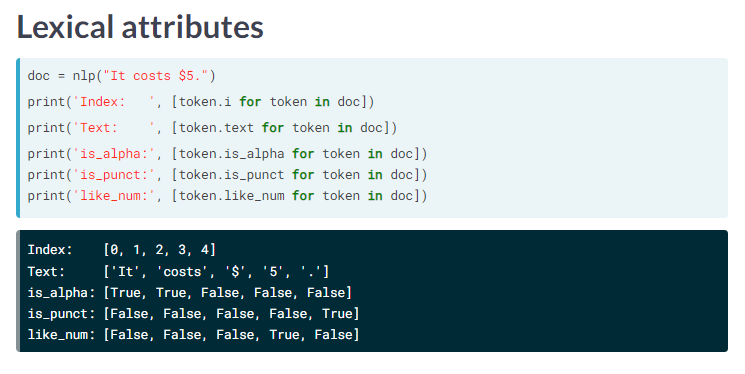

### Importing and printing Document in Multiple Languages

In [1]:
# Import the English language class
from spacy.lang.en import English

# Create the nlp object
nlp = English()

# Process a text
doc = nlp("This is a sentence.")

# Print the document text
print(doc.text)

This is a sentence.


In [3]:
# Import the German language class
from spacy.lang.de import German

# Create the nlp object
nlp = German()

# Process a text (this is German for: "Kind regards!")
doc = nlp("Liebe Grüße!")

# Print the document text
print(doc.text)

Liebe Grüße!


In [4]:
# Import the Spanish language class
from spacy.lang.es import Spanish

# Create the nlp object
nlp = Spanish()

# Process a text (this is Spanish for: "How are you?")
doc = nlp("¿Cómo estás?")

# Print the document text
print(doc.text)

¿Cómo estás?


### Documents, spans and tokens

When you call nlp on a string, spaCy first tokenizes the text and creates a document object

In [6]:
# Import the English language class and create the nlp object
from spacy.lang.en import English
nlp = English()

# Process the text
doc = nlp("I like tree kangaroos and narwhals.")

# Select the first token
first_token = doc[0]

# Print the first token's text
print(first_token.text)

# A slice of the Doc for "tree kangaroos"
tree_kangaroos = doc[2:4]
print(tree_kangaroos.text)

# A slice of the Doc for "tree kangaroos and narwhals" (without the ".")
tree_kangaroos_and_narwhals = doc[2:6]
print(tree_kangaroos_and_narwhals.text)

I
tree kangaroos
tree kangaroos and narwhals


### Lexical attributes

Use spaCy's Doc and Token objects, and lexical attributes to find percentages in a text. You'll be looking for two subsequent tokens: a number and a percent sign

In [7]:
# Process the text
doc = nlp("In 1990, more than 60% of people in East Asia were in extreme poverty. Now less than 4% are.")

# Iterate over the tokens in the doc
for token in doc:
    # Check if the token resembles a number
    if token.like_num:
        # Get the next token in the document
        next_token = doc[token.i + 1]
        # Check if the next token's text equals '%'
        if next_token.text == '%':
            print('Percentage found:', token.text)

Percentage found: 60
Percentage found: 4


## Statistical Models

Some of the things you analyse are Context-Specific. 

Some Pretrained Model Packages are: en_core_web_sm - Small English Model Trained on Web Texts

Statistical models allow you to generalize based on a set of training examples. Once they're trained, they use binary weights to make predictions. That's why it's not necessary to ship them with their training data.

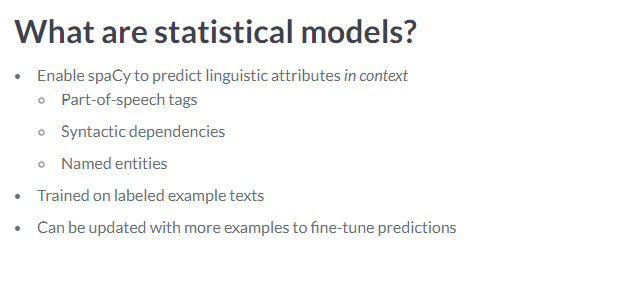

In [9]:
# Load the 'en_core_web_sm' model – spaCy is already imported
import spacy
nlp = spacy.load('en_core_web_sm')

text = "It’s official: Apple is the first U.S. public company to reach a $1 trillion market value"

# Process the text
doc = nlp(text)

# Print the document text
print(doc.text)

It’s official: Apple is the first U.S. public company to reach a $1 trillion market value


In [11]:
'''
# Load the 'de_core_news_sm' model – spaCy is already imported
nlp = spacy.load('de_core_news_sm')

text = "Als erstes Unternehmen der Börsengeschichte hat Apple einen Marktwert von einer Billion US-Dollar erreicht"

# Process the text
doc = nlp(text)

# Print the document text
print(doc.text)
'''

'\n# Load the \'de_core_news_sm\' model – spaCy is already imported\nnlp = spacy.load(\'de_core_news_sm\')\n\ntext = "Als erstes Unternehmen der Börsengeschichte hat Apple einen Marktwert von einer Billion US-Dollar erreicht"\n\n# Process the text\ndoc = nlp(text)\n\n# Print the document text\nprint(doc.text)\n'

In [12]:
text = "It’s official: Apple is the first U.S. public company to reach a $1 trillion market value"

# Process the text
doc = nlp(text)

for token in doc:
    # Get the token text, part-of-speech tag and dependency label
    token_text = token.text
    token_pos = token.pos_
    token_dep = token.dep_
    # This is for formatting only
    print('{:<12}{:<10}{:<10}'.format(token_text, token_pos, token_dep))

It          PRON      nsubj     
’s          PROPN     ROOT      
official    NOUN      acomp     
:           PUNCT     punct     
Apple       PROPN     nsubj     
is          VERB      ROOT      
the         DET       det       
first       ADJ       amod      
U.S.        PROPN     nmod      
public      ADJ       amod      
company     NOUN      attr      
to          PART      aux       
reach       VERB      relcl     
a           DET       det       
$           SYM       quantmod  
1           NUM       compound  
trillion    NUM       nummod    
market      NOUN      compound  
value       NOUN      dobj      


In [13]:
text = "It’s official: Apple is the first U.S. public company to reach a $1 trillion market value"

# Process the text
doc = nlp(text)

# Iterate over the predicted entities
for ent in doc.ents:
    # print the entity text and its label
    print(ent.text, ent.label_)

Apple ORG
first ORDINAL
U.S. GPE
$1 trillion MONEY


In [14]:
# Next you'll see what happens if the model is wrong, and how to adjust it.Models are statistical and not always right. 
# Whether their predictions are correct depends on the training data and the text you're processing.

text = "New iPhone X release date leaked as Apple reveals pre-orders by mistake"

# Process the text
doc = nlp(text)

# Iterate over the entities
for token in doc.ents:
    # print the entity text and label
    print(token.text, token.label_)

Apple ORG


In [16]:
text = "New iPhone X release date leaked as Apple reveals pre-orders by mistake"

# Process the text
doc = nlp(text)

# Iterate over the entities
for ent in doc.ents:
    # print the entity text and label
    print(ent.text, ent.label_)

# Get the span for "iPhone X"
iphone_x = doc[1:3]

# Print the span text
print('Missing entity:', iphone_x.text)

# You can do it by learning about spaCy's rule-based matcher, which can help you find certain words and phrases in text.

Apple ORG
Missing entity: iPhone X


## Rule Based Matching

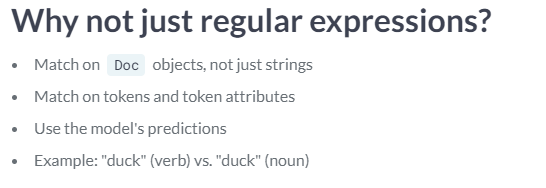

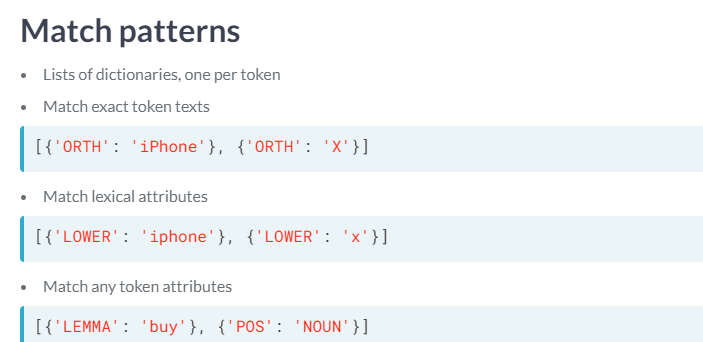

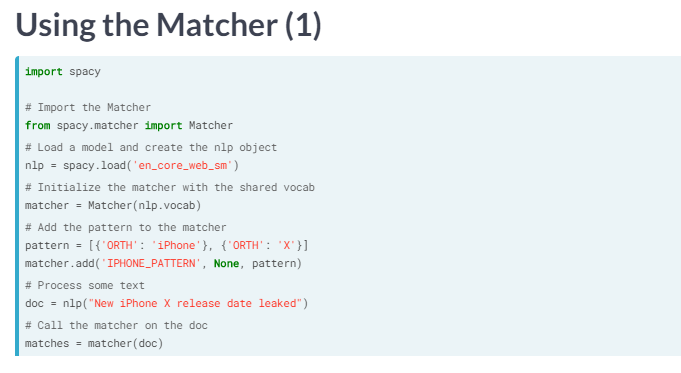

#### Advanced Level Matchers are shown below <br>

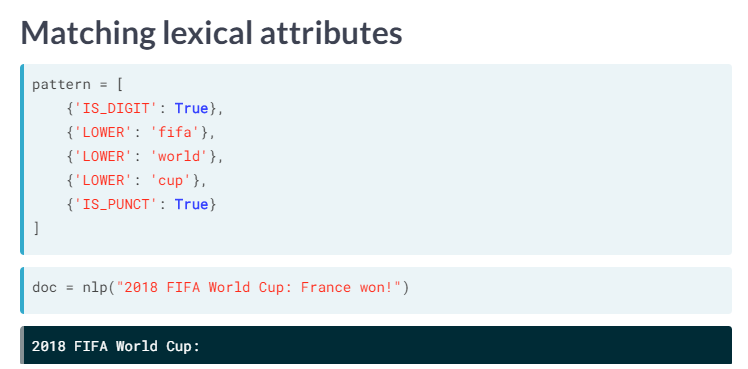

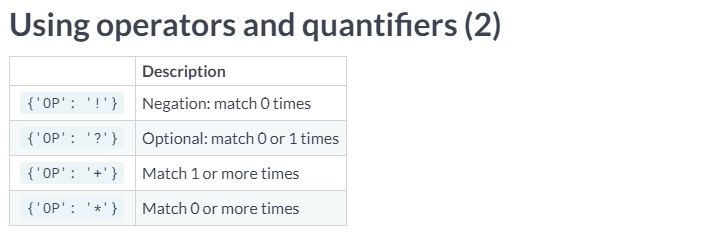

In [17]:
# Import the Matcher
from spacy.matcher import Matcher

# Initialize the Matcher with the shared vocabulary
matcher = Matcher(nlp.vocab)

# Create a pattern matching two tokens: "iPhone" and "X"
pattern = [{'TEXT': 'iPhone'}, {'TEXT': 'X'}]

# Add the pattern to the matcher
matcher.add('IPHONE_X_PATTERN', None, pattern)

In [19]:
# Import the Matcher and initialize it with the shared vocabulary
from spacy.matcher import Matcher
matcher = Matcher(nlp.vocab)

# Create a pattern matching two tokens: "iPhone" and "X"
pattern = [{'TEXT': 'iPhone'}, {'TEXT': 'X'}]

# Add the pattern to the matcher
matcher.add('IPHONE_X_PATTERN', None, pattern)

# Doc String

doc = nlp("New iPhone X release date leaked as Apple reveals pre-orders by mistake")


# Use the matcher on the doc
matches = matcher(doc)
print('Matches:', [doc[start:end].text for match_id, start, end in matches])

Matches: ['iPhone X']


#### Advanced Matching

In [21]:
# Write one pattern that only matches mentions of the full iOS versions: "iOS 7", "iOS 11" and "iOS 10".

doc = nlp("After making the iOS update you won't notice a radical system-wide redesign: nothing like the aesthetic upheaval we got with iOS 7. Most of iOS 11's furniture remains the same as in iOS 10. But you will discover some tweaks once you delve a little deeper.")

# Write a pattern for full iOS versions ("iOS 7", "iOS 11", "iOS 10")
pattern = [{'TEXT': 'iOS'}, {'IS_DIGIT': True}]

# Add the pattern to the matcher and apply the matcher to the doc
matcher.add('IOS_VERSION_PATTERN', None, pattern)
matches = matcher(doc)
print('Total matches found:', len(matches))

# Iterate over the matches and print the span text
for match_id, start, end in matches:
    print('Match found:', doc[start:end].text)

Total matches found: 3
Match found: iOS 7
Match found: iOS 11
Match found: iOS 10


In [22]:
# Write one pattern that only matches forms of "download" (tokens with the lemma "download"), followed by a token with the 
# part-of-speech tag 'PROPN' (proper noun).

doc = nlp("i downloaded Fortnite on my laptop and can't open the game at all. Help? so when I was downloading Minecraft, I got the Windows version where it is the '.zip' folder and I used the default program to unpack it... do I also need to download Winzip?")

# Write a pattern that matches a form of "download" plus proper noun
pattern = [{'LEMMA': 'download'}, {'POS': 'PROPN'}]

# Add the pattern to the matcher and apply the matcher to the doc
matcher.add('DOWNLOAD_THINGS_PATTERN', None, pattern)
matches = matcher(doc)
print('Total matches found:', len(matches))

# Iterate over the matches and print the span text
for match_id, start, end in matches:
    print('Match found:', doc[start:end].text)

Total matches found: 3
Match found: downloaded Fortnite
Match found: downloading Minecraft
Match found: download Winzip


In [23]:
# Write one pattern that matches adjectives ('ADJ') followed by one or two 'NOUN's (one noun and one optional noun).

doc = nlp("Features of the app include a beautiful design, smart search, automatic labels and optional voice responses.")

# Write a pattern for adjective plus one or two nouns
pattern = [{'POS': 'ADJ'}, {'POS': 'NOUN'}, {'POS': 'NOUN', 'OP': '?'}]

# Add the pattern to the matcher and apply the matcher to the doc
matcher.add('ADJ_NOUN_PATTERN', None, pattern)
matches = matcher(doc)
print('Total matches found:', len(matches))

# Iterate over the matches and print the span text
for match_id, start, end in matches:
    print('Match found:', doc[start:end].text)

Total matches found: 4
Match found: beautiful design
Match found: smart search
Match found: automatic labels
Match found: optional voice responses


# Data Structures - Vocab, Lexemes and StringStore 

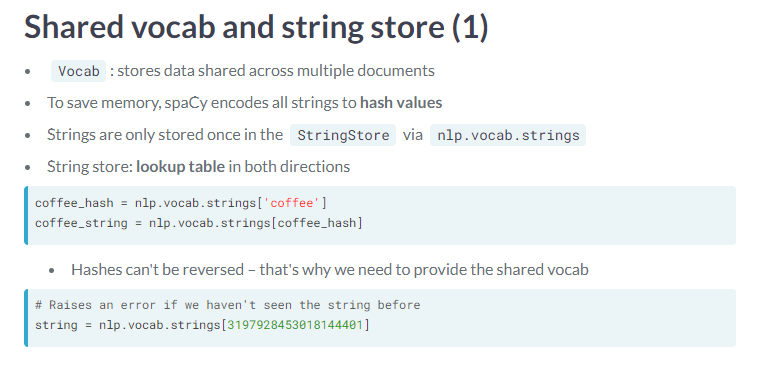

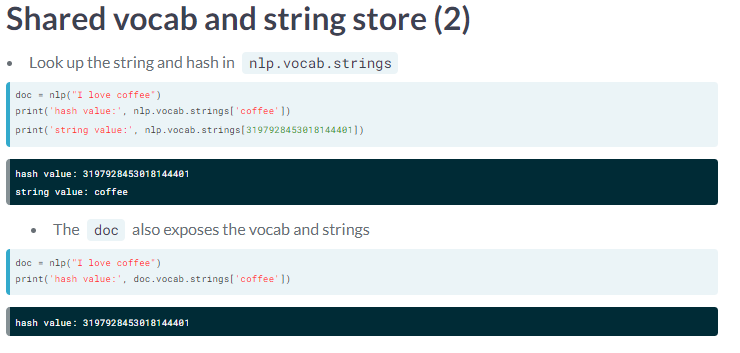

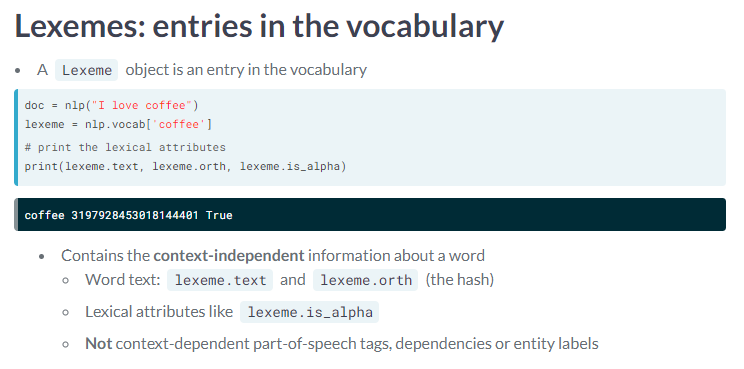

In [28]:
# Look up the hash for the string label "PERSON"
# Any string can be converted to a hash.
#Hashes can't be reversed. To prevent this problem, add the word to the new vocab by processing a text or looking up the 
# string, or use the same vocab to resolve the hash back to a string.

person_hash = nlp.vocab.strings['PERSON']
print(person_hash)

# Look up the person_hash to get the string
person_string = nlp.vocab.strings[380]
print(person_string)

380
PERSON


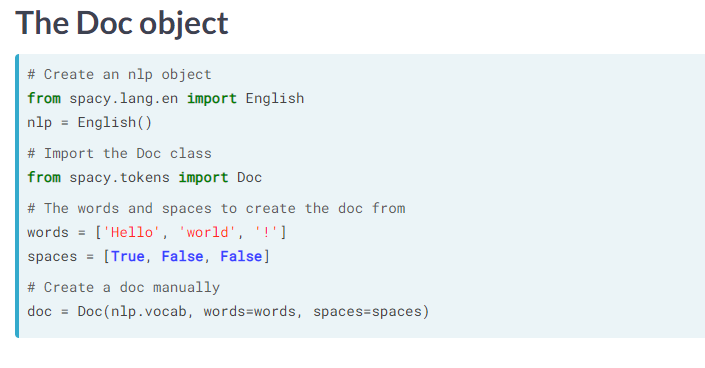

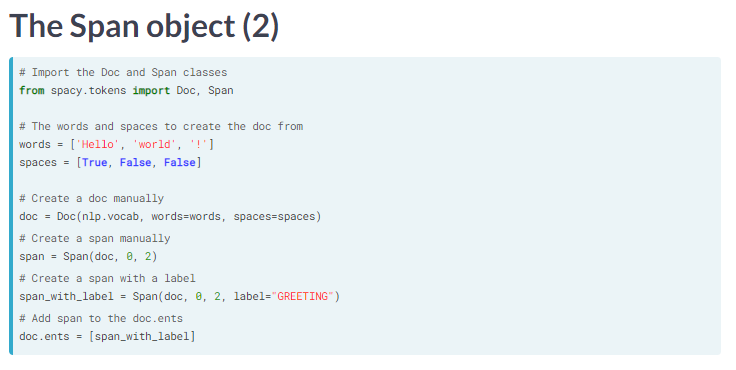

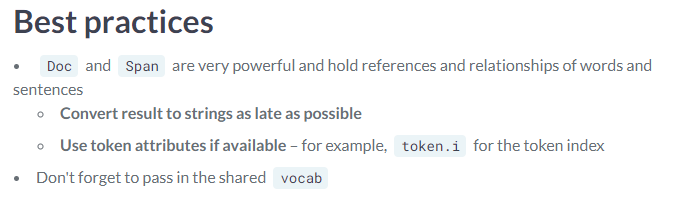

In [29]:
# Import the Doc class
from spacy.tokens import Doc

# Desired text: "spaCy is cool!"
words = ['spaCy', 'is', 'cool', '!']
spaces = [True, True, False, False]

# Create a Doc from the words and spaces
doc = Doc(nlp.vocab, words=words, spaces=spaces)
print(doc.text)

spaCy is cool!


In [30]:
# Import the Doc class
from spacy.tokens import Doc

# Desired text: "Go, get started!"
words = ['Go', ',', 'get', 'started', '!']
spaces = [False, True, True, False, False]

# Spaces Comes after the Words eg: Go -> False - , -> True

# Create a Doc from the words and spaces
doc = Doc(nlp.vocab, words=words, spaces=spaces)
print(doc.text)

Go, get started!


In [31]:
# Import the Doc class
from spacy.tokens import Doc

# Desired text: "Oh, really?!"
words = ['Oh', ',', 'really', '?', '!']
spaces = [False, True, False, False, False]

# Create a Doc from the words and spaces
doc = Doc(nlp.vocab, words=words, spaces=spaces)
print(doc.text)

Oh, really?!


#### Now we come to Creating Entities. <br>
Creating spaCy's objects manually and modifying the entities will come in handy later when you're writing your own information extraction pipelines.

In [34]:
# Import the Doc and Span classes
from spacy.tokens import Doc, Span

words = ['I', 'like', 'David', 'Bowie']
spaces = [True, True, True, False]

# Create a doc from the words and spaces
doc = Doc(nlp.vocab, words, spaces)
print(doc.text)

I like David Bowie


In [32]:
# Import the Doc and Span classes
from spacy.tokens import Doc, Span

# Create a doc from the words and spaces
doc = Doc(nlp.vocab, words=['I', 'like', 'David', 'Bowie'], spaces=[True, True, True, False])

# Create a span for "David Bowie" from the doc and assign it the label "PERSON"
span = Span(doc, 2, 4, label="PERSON")
print(span.text, span.label_)

David Bowie PERSON


In [33]:
# Import the Doc and Span classes
from spacy.tokens import Doc, Span

# Create a doc from the words and spaces
doc = Doc(nlp.vocab, words=['I', 'like', 'David', 'Bowie'], spaces=[True, True, True, False])

# Create a span for "David Bowie" from the doc and assign it the label "PERSON"
span = Span(doc, 2, 4, label='PERSON')

# Add the span to the doc's entities
doc.ents = [span]

# Print entities' text and labels
print([(ent.text, ent.label_) for ent in doc.ents])

[('David Bowie', 'PERSON')]


In [35]:
# Test Code with Valid Format Notation/ Best Practices

# Iterate over the tokens
for token in doc:
    # Check if the current token is a proper noun
    if token.pos_ == 'PROPN':
        # Check if the next token is a verb
        if doc[token.i + 1].pos_ == 'VERB':
            print('Found a verb after a proper noun!')

## Word Vectors and their Semantic Similarities

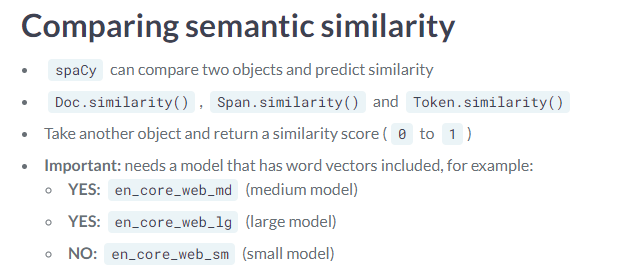

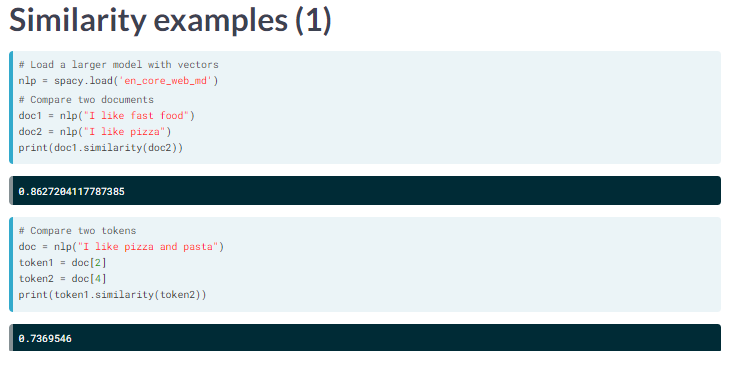

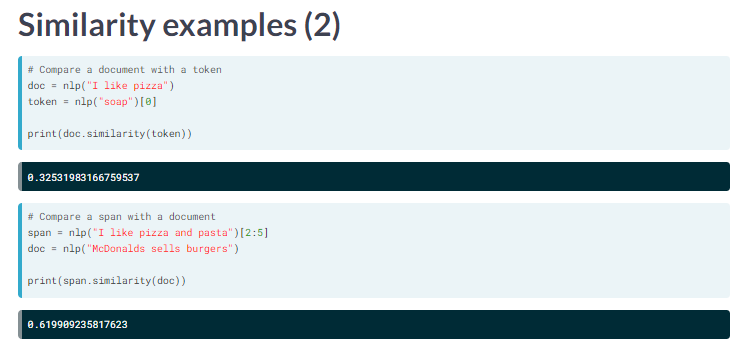

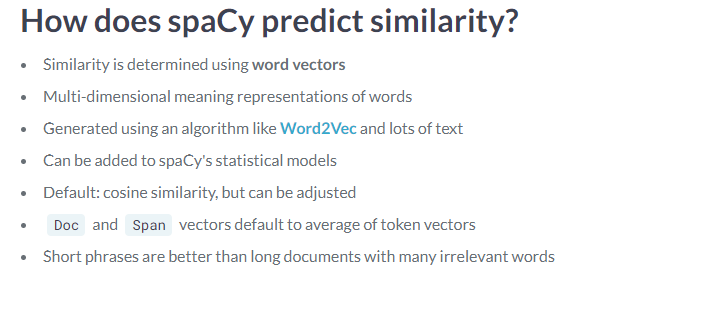

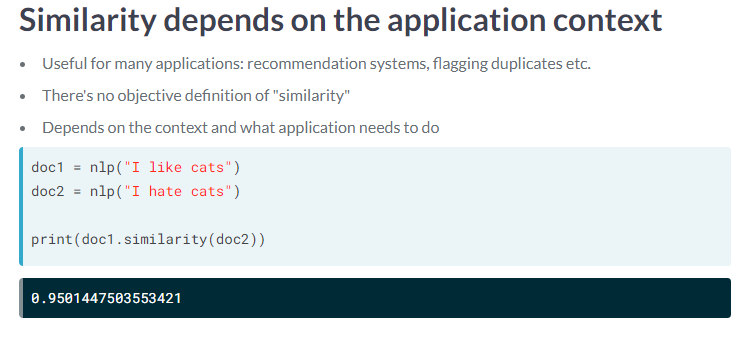

### Inspecting word vectors

The similarities are not always this conclusive. This is just the basic experiments. Once you're getting serious about developing NLP applications that leverage semantic similarity, you might want to train vectors on your own data, or tweak the similarity algorithm.

In [37]:
# Load the en_core_web_md model
nlp = spacy.load('en_core_web_sm') # Use en_core_web_md or large instead of sm

# Process a text
doc = nlp("Two bananas in pyjamas")

# Get the vector for the token "bananas"
bananas_vector = doc[1].vector
print(bananas_vector)

[ 2.1561384   0.6859281  -1.8234854   0.4145496  -0.886605    5.0773377
  0.28650832  3.6156225  -2.627604    5.01052     2.6055033   5.4986916
 -0.82726336 -2.4128723  -1.5714562   0.67344356 -1.1230624   3.017315
  3.4531426   2.6312394  -2.3144596   2.0717711  -0.5736556  -0.5199362
 -0.4892068   1.4417053   1.1748309   3.291245    2.7368522   2.1909308
  2.4100504  -1.5442916  -0.81270695 -1.7967525  -2.4401696   0.96489155
 -5.071314    2.4865592  -1.1760099   1.0010973  -1.8218107   6.159581
  5.876448   -1.9877293   6.579393    1.0499439  -1.5798447  -4.1203165
 -0.17076118 -4.819325   -2.1152763  -4.640588    1.5844907  -3.2757292
  2.1921952  -0.47692332 -1.8678508   1.0092752   0.7716696  -0.37776387
  0.07058215 -0.18511617  5.209738   -3.002555   -1.8404679   4.089005
 -2.0230193   1.0394226  -1.7199193   1.0383378   0.23976706 -0.67239416
  1.3192352  -0.33726573  0.21724188 -0.5032941   0.26279616 -0.58214176
 -3.0981517  -4.9684753  -3.2268834  -4.5933228  -3.0618596  -0

In [38]:
# spaCy's similarity methods to compare Doc, Token and Span objects and get similarity scores.

doc1 = nlp("It's a warm summer day")
doc2 = nlp("It's sunny outside")

# Get the similarity of doc1 and doc2
similarity = doc1.similarity(doc2)
print(similarity)

D:\Anaconda\envs\py35\lib\runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)


0.5566261254871249


In [39]:
doc = nlp("TV and books")
token1, token2 = doc[0], doc[2]

# Get the similarity of the tokens "TV" and "books" 
similarity = token1.similarity(token2)
print(similarity)

D:\Anaconda\envs\py35\lib\runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)


0.3083113


In [40]:
doc = nlp("This was a great restaurant. Afterwards, we went to a really nice bar.")

# Create spans for "great restaurant" and "really nice bar"
span1 = doc[3:5]
span2 = doc[12:15]

# Get the similarity of the spans
similarity = span1.similarity(span2)
print(similarity)

D:\Anaconda\envs\py35\lib\runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Span.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)


0.7244181


## Combining Models and Rules

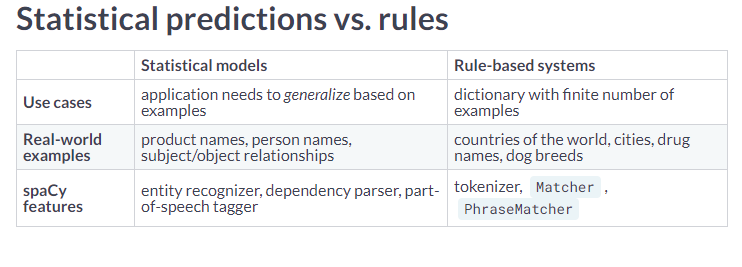

The tokenizer already takes care of splitting off whitespace and each dictionary in the pattern describes one token.

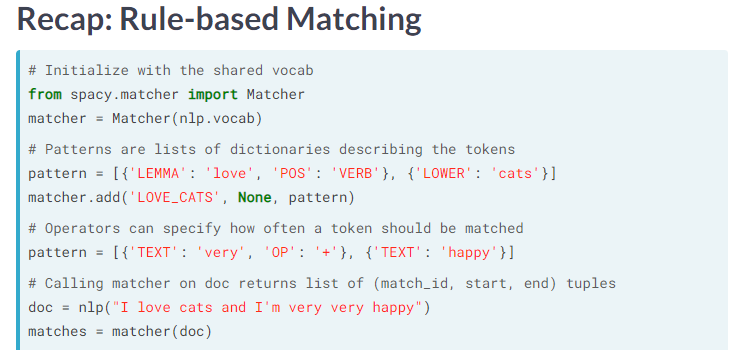

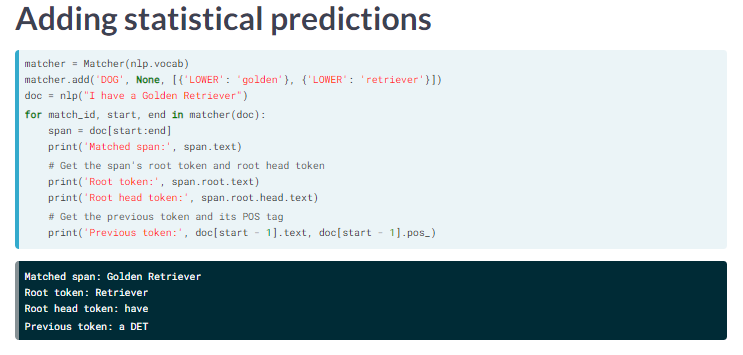

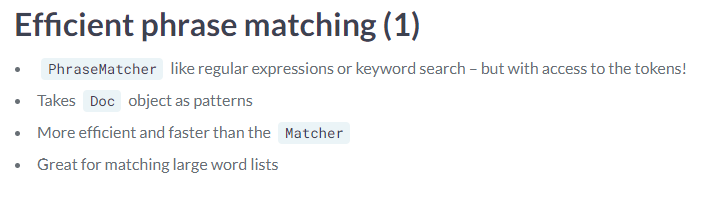

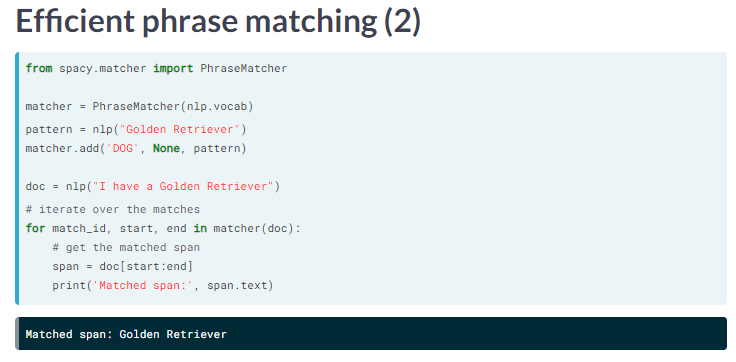

In [43]:
# Create the match patterns

doc = nlp("""
Twitch Prime, the perks program for Amazon Prime members offering free loot, games and other benefits, is ditching one of 
its best features: ad-free viewing. According to an email sent out to Amazon Prime members today, ad-free viewing will no 
longer be included as a part of Twitch Prime for new members, beginning on September 14. However, members with existing 
annual subscriptions will be able to continue to enjoy ad-free viewing until their subscription comes up for renewal. 
Those with monthly subscriptions will have access to ad-free viewing until October 15.""")

#Edit pattern1 so that it correctly matches all case-insensitive mentions of "Amazon" plus a title-cased proper noun.
pattern1 = [{'LOWER': 'amazon'}, {'IS_TITLE': True, 'POS': 'PROPN'}]
pattern2 = [{'LOWER': 'ad'}, {'TEXT': '-'}, {'LOWER': 'free'}, {'POS': 'NOUN'}]

# Initialize the Matcher and add the patterns
# Edit pattern2 so that it correctly matches all case-insensitive mentions of "ad-free", plus the following noun.

matcher = Matcher(nlp.vocab)
matcher.add('PATTERN1', None, pattern1)
matcher.add('PATTERN2', None, pattern2)

# Iterate over the matches
for match_id, start, end in matcher(doc):
    # Print pattern string name and text of matched span
    print(doc.vocab.strings[match_id], doc[start:end].text)

PATTERN1 Amazon Prime
PATTERN2 ad-free viewing
PATTERN1 Amazon Prime
PATTERN2 ad-free viewing
PATTERN2 ad-free viewing
PATTERN2 ad-free viewing


For the token '_', you can match on the attribute TEXT, LOWER or even SHAPE. All of those are correct. As you can see, paying close attention to the tokenization is very important when working with the token-based Matcher. Sometimes it's much easier to just match exact strings instead and use the PhraseMatcher. PhraseMatcher -> Sometimes it's more efficient to match exact strings instead of writing patterns describing the individual tokens. This is especially true for finite categories of things – like all countries of the world.



In [44]:
'''
# Import the PhraseMatcher and initialize it
from spacy.matcher import PhraseMatcher
matcher = PhraseMatcher(nlp.vocab)

# Create pattern Doc objects and add them to the matcher
# This is the faster version of: [nlp(country) for country in COUNTRIES]
patterns = list(nlp.pipe(COUNTRIES))
matcher.add('COUNTRY', None, *patterns)

# Call the matcher on the test document and print the result
matches = matcher(doc)
print([doc[start:end] for match_id, start, end in matches])

# Countries is already defined in Pipe of Spacy md
'''

NameError: name 'COUNTRIES' is not defined

In [51]:
text = """'After the Cold War, the UN saw a radical expansion in its peacekeeping duties, taking on more missions in ten years than it had in the previous four decades.Between 1988 and 2000, the number of adopted Security Council resolutions more than doubled, and the peacekeeping budget increased more than tenfold. The UN negotiated an end to the Salvadoran Civil War, launched a successful peacekeeping mission in Namibia, and oversaw democratic elections in post-apartheid South Africa and post-Khmer Rouge Cambodia. In 1991, the UN authorized a US-led coalition that repulsed the Iraqi invasion of Kuwait. Brian Urquhart, Under-Secretary-General from 1971 to 1985, later described the hopes raised by these successes as a "false renaissance" for the organization, given the more troubled missions that followed. Though the UN Charter had been written primarily to prevent aggression by one nation against another, in the early 1990s the UN faced a number of simultaneous, serious crises within nations such as Somalia, Haiti, Mozambique, and the former Yugoslavia. The UN mission in Somalia was widely viewed as a failure after the US withdrawal following casualties in the Battle of Mogadishu, and the UN mission to Bosnia faced "worldwide ridicule" for its indecisive and confused mission in the face of ethnic cleansing. In 1994, the UN Assistance Mission for Rwanda failed to intervene in the Rwandan genocide amid indecision in the Security Council. Beginning in the last decades of the Cold War, American and European critics of the UN condemned the organization for perceived mismanagement and corruption. In 1984, the US President, Ronald Reagan, withdrew his nation\'s funding from UNESCO (the United Nations Educational, Scientific and Cultural Organization, founded 1946) over allegations of mismanagement, followed by Britain and Singapore. Boutros Boutros-Ghali, Secretary-General from 1992 to 1996, initiated a reform of the Secretariat, reducing the size of the organization somewhat. His successor, Kofi Annan (1997–2006), initiated further management reforms in the face of threats from the United States to withhold its UN dues. In the late 1990s and 2000s, international interventions authorized by the UN took a wider variety of forms. The UN mission in the Sierra Leone Civil War of 1991–2002 was supplemented by British Royal Marines, and the invasion of Afghanistan in 2001 was overseen by NATO. In 2003, the United States invaded Iraq despite failing to pass a UN Security Council resolution for authorization, prompting a new round of questioning of the organization\'s effectiveness. Under the eighth Secretary-General, Ban Ki-moon, the UN has intervened with peacekeepers in crises including the War in Darfur in Sudan and the Kivu conflict in the Democratic Republic of Congo and sent observers and chemical weapons inspectors to the Syrian Civil War. In 2013, an internal review of UN actions in the final battles of the Sri Lankan Civil War in 2009 concluded that the organization had suffered "systemic failure". One hundred and one UN personnel died in the 2010 Haiti earthquake, the worst loss of life in the organization\'s history. The Millennium Summit was held in 2000 to discuss the UN\'s role in the 21st century. The three day meeting was the largest gathering of world leaders in history, and culminated in the adoption by all member states of the Millennium Development Goals (MDGs), a commitment to achieve international development in areas such as poverty reduction, gender equality, and public health. Progress towards these goals, which were to be met by 2015, was ultimately uneven. The 2005 World Summit reaffirmed the UN\'s focus on promoting development, peacekeeping, human rights, and global security. The Sustainable Development Goals were launched in 2015 to succeed the Millennium Development Goals. In addition to addressing global challenges, the UN has sought to improve its accountability and democratic legitimacy by engaging more with civil society and fostering a global constituency. In an effort to enhance transparency, in 2016 the organization held its first public debate between candidates for Secretary-General. On 1 January 2017, Portuguese diplomat António Guterres, who previously served as UN High Commissioner for Refugees, became the ninth Secretary-General. Guterres has highlighted several key goals for his administration, including an emphasis on diplomacy for preventing conflicts, more effective peacekeeping efforts, and streamlining the organization to be more responsive and versatile to global needs.'"""

In [54]:
# Create a doc and find matches in it
doc = nlp(text)

# Iterate over the matches
for match_id, start, end in matcher(doc):
    # Create a Span with the label for "GPE"
    span = Span(doc, start, end, label='GPE')

    # Overwrite the doc.ents and add the span
    doc.ents = list(doc.ents) + [span]

# Print the entities in the document
print([(ent.text, ent.label_) for ent in doc.ents if ent.label_ == 'GPE'])

[('Namibia', 'GPE'), ('South Africa', 'GPE'), ('US', 'GPE'), ('Kuwait', 'GPE'), ('Somalia', 'GPE'), ('Haiti', 'GPE'), ('Yugoslavia', 'GPE'), ('Somalia', 'GPE'), ('US', 'GPE'), ('Bosnia', 'GPE'), ('US', 'GPE'), ('Britain', 'GPE'), ('Singapore', 'GPE'), ('Secretariat', 'GPE'), ('the United States', 'GPE'), ('Afghanistan', 'GPE'), ('the United States', 'GPE'), ('Iraq', 'GPE'), ('Darfur', 'GPE'), ('Sudan', 'GPE'), ('the Democratic Republic of Congo', 'GPE')]


In [55]:
# Create a doc and find matches in it - Output Not Showing here. Check on Other IDE's
doc = nlp(text)

# Iterate over the matches
for match_id, start, end in matcher(doc):
    # Create a Span with the label for "GPE" and overwrite the doc.ents
    span = Span(doc, start, end, label='GPE')
    doc.ents = list(doc.ents) + [span]
    
    print('Validation 1')
    # Get the span's root head token
    span_root_head = span.root.head
    # Print the text of the span root's head token and the span text
    print('countries')
    print(span_root_head.text, '-->', span.text)

# Completion of Chapter 1